In [6]:
import torch
import sys
sys.path.append('/Users/diegofiori/Desktop/epfl/master_thesis/master_thesis/')
from deep_models import *

In [7]:
path = '/Users/diegofiori/Desktop/epfl/master_thesis/results/'
model = torch.load(path+'model.pt')

In [8]:
model

UNet(
  (embedding_layer): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (encoder_layers): ModuleList(
    (0): DownLayer(
      (max_pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
      (conv): ConvLayer(
        (drop1): Dropout2d(p=0, inplace=False)
        (conv1): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        (drop2): Dropout2d(p=0, inplace=False)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      )
    )
    (1): DownLayer(
      (max_pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
      (conv): ConvLayer(
        (drop1): Dropout2d(p=0, inplace=False)
        (conv1): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        (drop2): Dropout2d(p=0, inplace=False)
        (conv2): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      )
    )
  )
  (middle_layer): ConvLayer(
    (drop1): Dro

In [9]:
from input_reader import read_simulation_file, get_all_time_ids
time_ids = get_all_time_ids('/Users/diegofiori/Desktop/epfl/master_thesis/Reverse/')

In [11]:
len(time_ids)

63

In [15]:
import matplotlib.pyplot as plt
images_te = read_simulation_file('/Users/diegofiori/Desktop/epfl/master_thesis/Reverse/', 'temperature', time_ids[:2])
with torch.no_grad():
    pred = model(transform_into_tensor(images_te))
    pred = torch.mean(pred.to_numpy(), dim=0)
plt.figure()
plt.imshow(pred)
plt.figure()
target = read_simulation_file('/Users/diegofiori/Desktop/epfl/master_thesis/Reverse/', 'temperature', time_ids[-2:])
plt.imshow(target.mean())

AttributeError: 'Tensor' object has no attribute 'to_array'

TypeError: Invalid shape (1, 244, 324) for image data

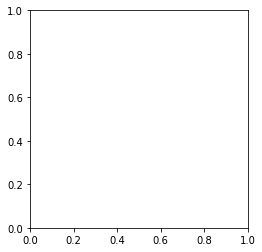

In [19]:
pred = torch.mean(pred, dim=0).numpy()

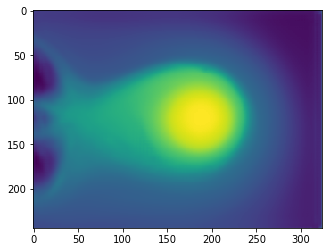

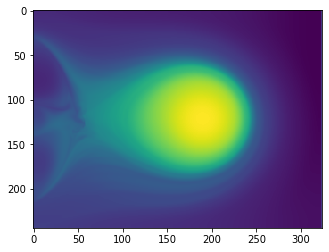

In [23]:
plt.figure()
plt.imshow(pred[0])
plt.figure()
target = read_simulation_file('/Users/diegofiori/Desktop/epfl/master_thesis/Reverse/', 'temperature', time_ids[-2:])
plt.imshow(target.mean(axis=0))

In [25]:
import numpy as np
np.mean(np.sqrt(np.abs(pred[0]-target)**2))

0.19444601

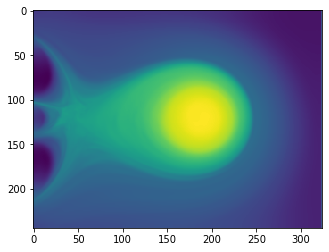

In [26]:
plt.figure()
target = read_simulation_file('/Users/diegofiori/Desktop/epfl/master_thesis/Reverse/', 'temperature', time_ids[:2])
plt.imshow(target.mean(axis=0))

In [27]:
np.mean(np.sqrt(np.abs(pred[0]-target)**2))

0.06792842